# Environment

In [ ]:
import os

In [ ]:
# clone the git repository and set it as the working directory
! git clone https://github.com/kimiaf1998/Parking-Space-Detection.git
os.chdir('Parking-Space-Detection/Modules/Space')

In [17]:
from dataset import acpds
from utils_funcs import transforms
from utils_funcs import visualize as vis
from pycocotools.coco import COCO
from PIL import Image
from torchvision.io import read_images
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


# Visualize dataset

In [9]:
# load dataset
train_ds, valid_ds, test_ds = acpds.create_datasets('dataset/data', 8)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [77]:
coco = COCO('dataset/data/test.json')
img_dir = 'dataset/data/images'
# load first image
image_id = 0

img = coco.imgs[image_id]

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


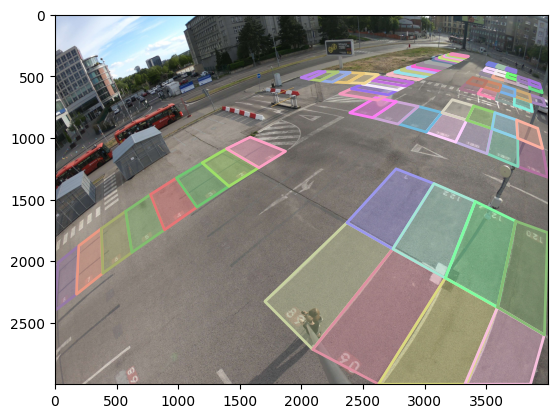

In [78]:
# load image annotations
image = numpy.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image)
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

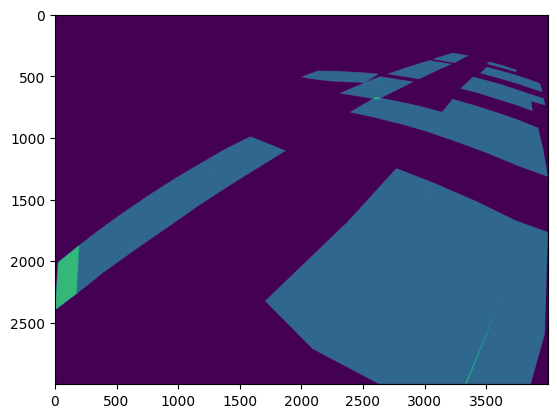

In [79]:
# load masks annotations
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask)

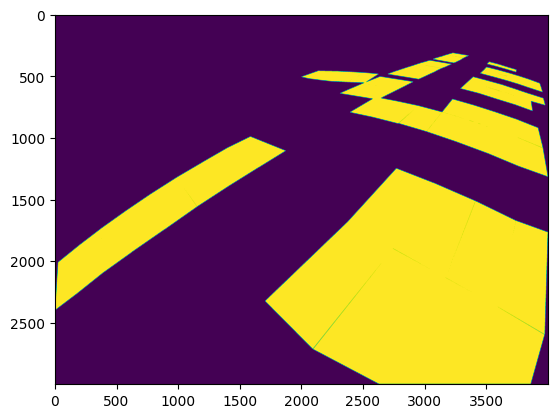

In [80]:
# show vacant parking spaces
cat_ids = coco.getCatIds()
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
anns_img = np.zeros((img['height'],img['width']))
for ann in anns:
    anns_img = np.maximum(anns_img,coco.annToMask(ann)*(2-ann['category_id']))
plt.imshow(anns_img)

# Plot model predictions

In [12]:
device = torch.device('cpu')

In [13]:
img_path = 'dataset/data/images/GOPR6543.JPG'
img = read_image(img_path)

In [16]:
from inference import get_mask_rcnn_model as MaskRCNN
from inference import predict
preds = predict(model=MaskRCNN(weights='./MyFRCNN_model_5/LR_8e-05_AdamW_CosineAnnealingLR/weights_epoch_29.pt' , device=device), img_path=img_path, device=device)
print(pred)

torch.Size([100, 1, 3000, 4000])


In [13]:
from utils_funcs import visualize as vis
print(preds[0]['masks'].shape)

torch.Size([100, 1, 3000, 4000])


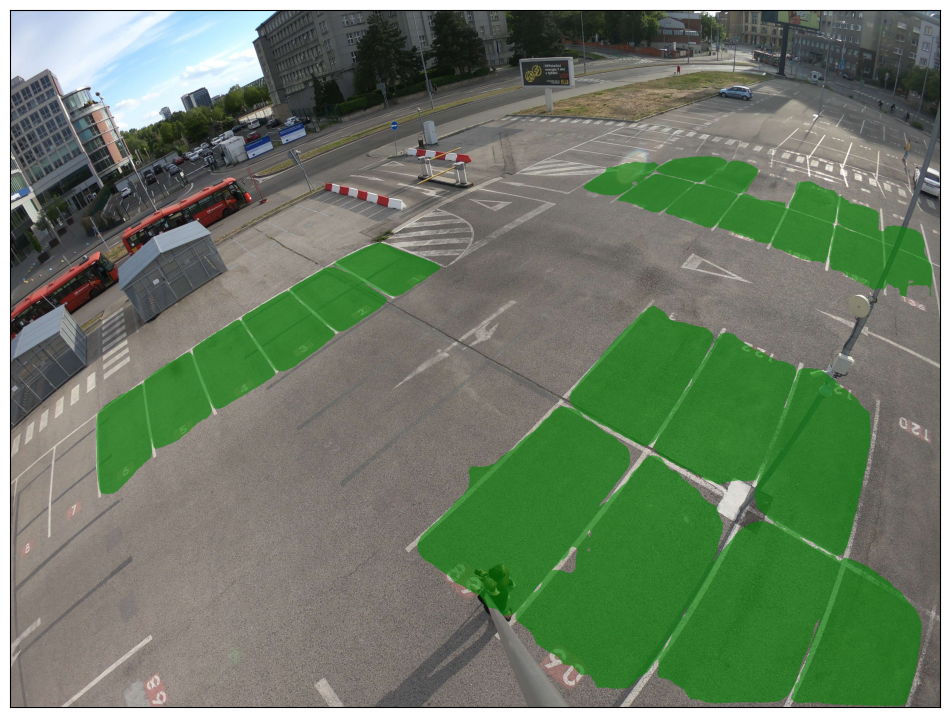

In [14]:
vis.show_mask_predictions([img], preds, score_threshold=.4)

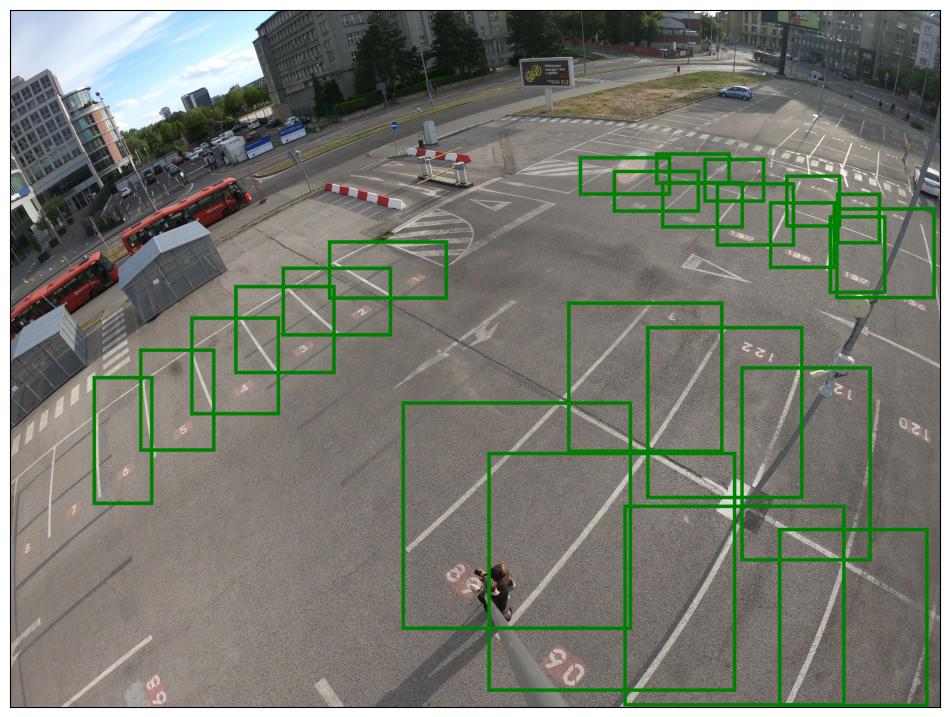

In [15]:
vis.show_box_predictions([img], preds, score_threshold=.4, box_width=15)